# Project: Climate Change Modeling

## Understanding the Problem
**Goal:** Develop a machine learning model to predict global temperature changes based on environmental factors (CO2, Sea Level, etc.).

**Target Variable:** `Temperature`

**Input Features:** `CO2 Emissions`, `Sea Level Rise`, `Precipitation`, `Humidity`, `Wind Speed`.

**Approach:** 
1. Analyze historical trends.
2. Build multiple models (Linear, Tree-based).
3. Select the best model to forecast future temperatures.

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Visualization configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Load Dataset

df = pd.read_csv('climate_change_data.csv')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data chronologically
df = df.sort_values('Date').reset_index(drop=True)

print("Dataset Loaded Successfully")
print("Shape:", df.shape)
print("Date Range:", df['Date'].min(), "→", df['Date'].max())

display(df.head())

Dataset Loaded Successfully
Shape: (10000, 9)
Date Range: 2000-01-01 00:00:00 → 2022-12-31 00:00:00


,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


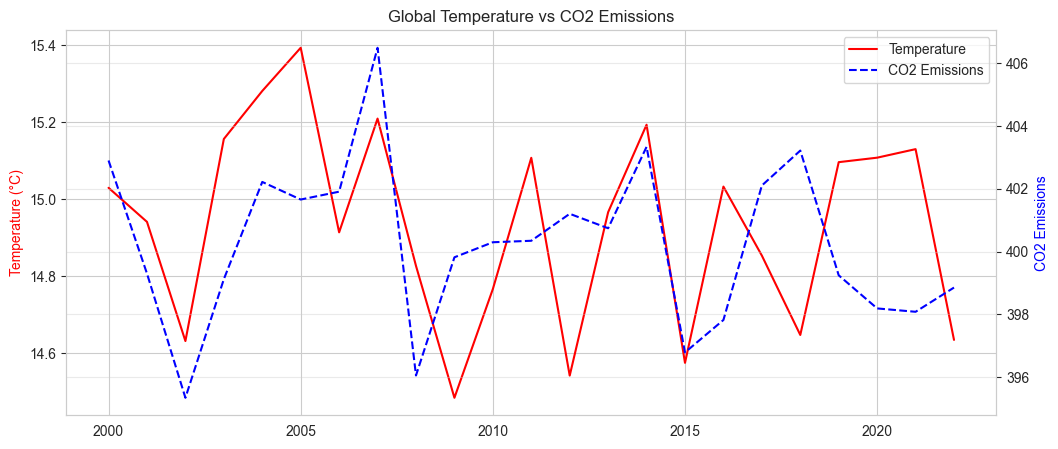

In [3]:
# Global Climate Trend Analysis

# Extract year from date
df['Year'] = df['Date'].dt.year

# Aggregate yearly global averages
global_yearly = df.groupby('Year')[['Temperature', 'CO2 Emissions']].mean()

# Dual-axis plot for temperature and CO2
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(global_yearly.index, global_yearly['Temperature'],
         color='red', label='Temperature')
ax1.set_ylabel('Temperature (°C)', color='red')

ax2 = ax1.twinx()
ax2.plot(global_yearly.index, global_yearly['CO2 Emissions'],
         color='blue', linestyle='--', label='CO2 Emissions')
ax2.set_ylabel('CO2 Emissions', color='blue')

# Combine legends from both axes

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)

plt.title('Global Temperature vs CO2 Emissions')
plt.grid(alpha=0.4)
plt.show()


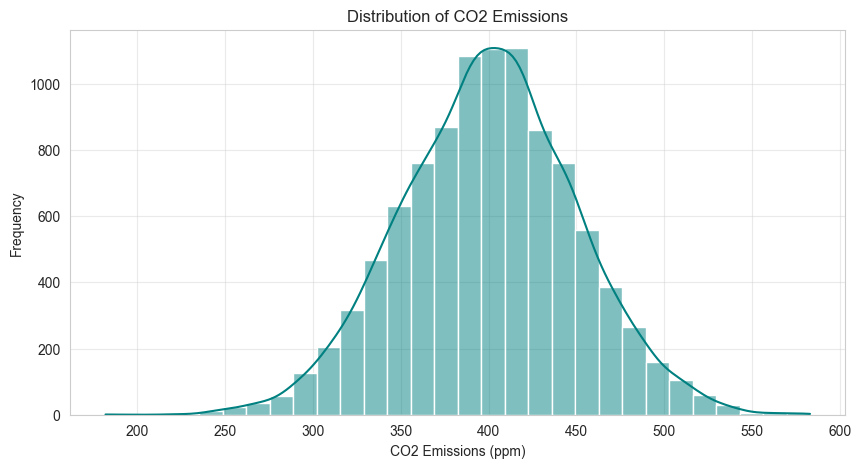

In [4]:

# Distribution of CO2 Emissions


plt.figure(figsize=(10, 5))

# Histogram to understand CO2 spread
sns.histplot(df['CO2 Emissions'], bins=30, kde=True, color='teal')

plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (ppm)')
plt.ylabel('Frequency')
plt.grid(alpha=0.4)
plt.show()


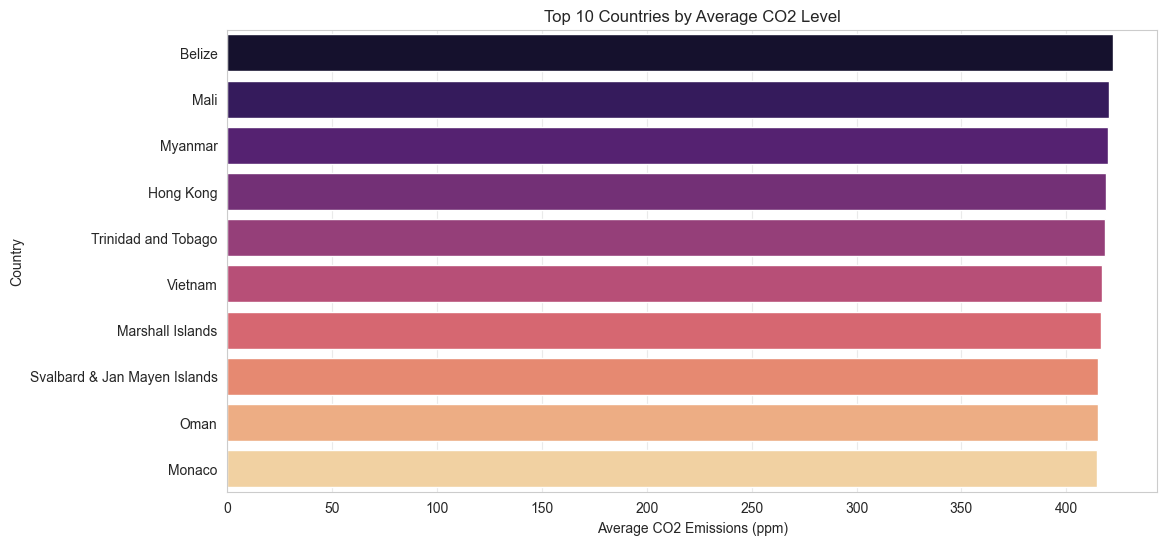

In [5]:
# Country-wise CO2 Analysis

# Identify top 10 countries with highest average CO2
top_countries = (
    df.groupby('Country')['CO2 Emissions']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='CO2 Emissions', y='Country', data=top_countries, palette='magma')
plt.title('Top 10 Countries by Average CO2 Level')
plt.xlabel('Average CO2 Emissions (ppm)')
plt.ylabel('Country')
plt.grid(axis='x', alpha=0.4)
plt.show()


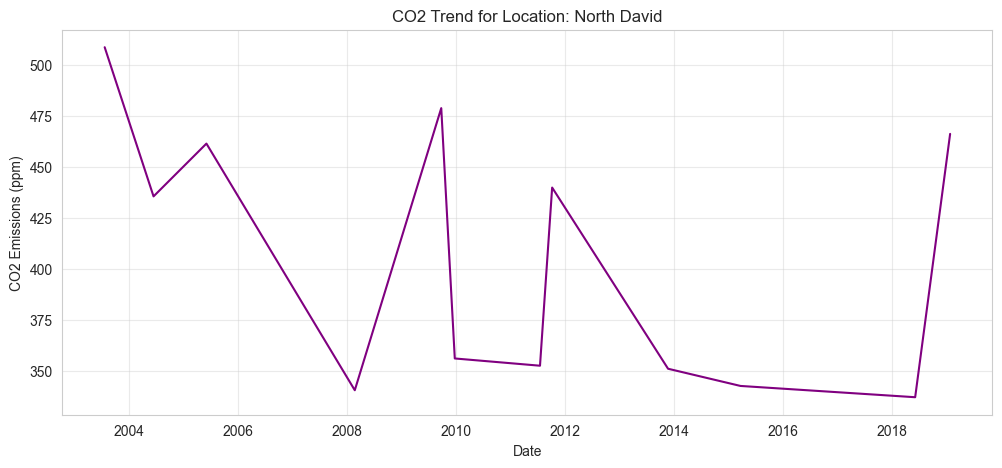

In [6]:
# Location-Specific Analysis

# Choose location with maximum data availability
top_loc = df['Location'].value_counts().idxmax()
loc_data = df[df['Location'] == top_loc]

plt.figure(figsize=(12, 5))
plt.plot(loc_data['Date'], loc_data['CO2 Emissions'], color='purple')

plt.title(f'CO2 Trend for Location: {top_loc}')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions (ppm)')
plt.grid(alpha=0.4)
plt.show()


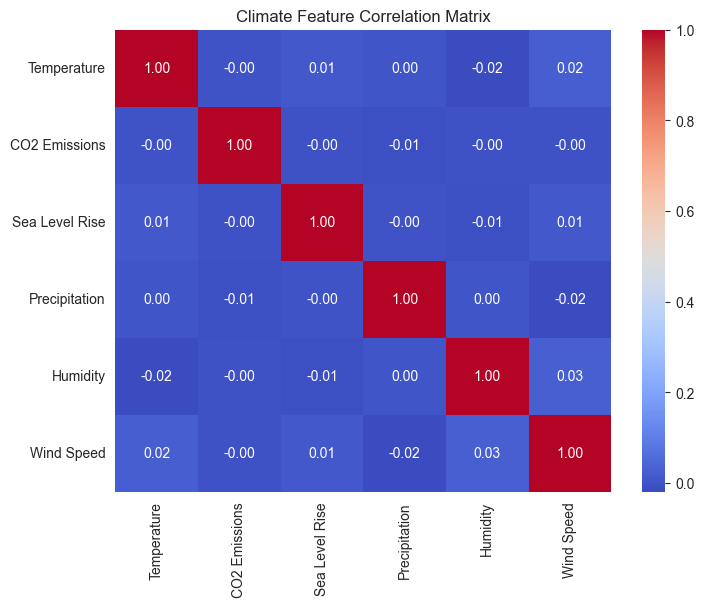

In [7]:
# Correlation Analysis

# Select numerical climate features
corr_features = df[
    ['Temperature', 'CO2 Emissions', 'Sea Level Rise',
     'Precipitation', 'Humidity', 'Wind Speed']
]

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_features.corr(),
            annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Climate Feature Correlation Matrix')
plt.show()


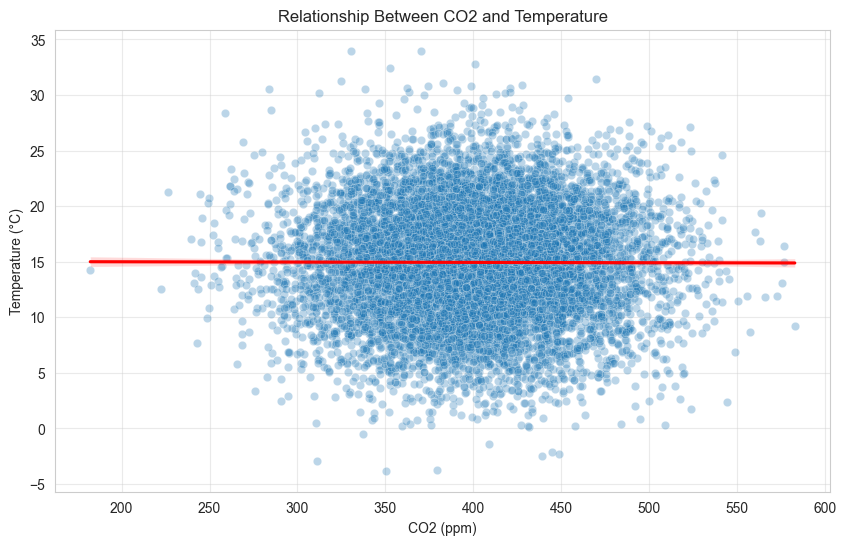

In [8]:
# CO2 vs Temperature Relationship

plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='CO2 Emissions', y='Temperature', data=df, alpha=0.3)

# Regression line to show trend
sns.regplot(x='CO2 Emissions', y='Temperature',
            data=df, scatter=False, color='red')

plt.title('Relationship Between CO2 and Temperature')
plt.xlabel('CO2 (ppm)')
plt.ylabel('Temperature (°C)')
plt.grid(alpha=0.4)
plt.show()


In [9]:
# Monthly Global Aggregation

# Convert date to Year-Month format
df['YearMonth'] = df['Date'].dt.to_period('M')

# Aggregate location-level data into global monthly averages
global_df = (
    df.groupby('YearMonth', as_index=False)[
        ['Temperature', 'CO2 Emissions', 'Sea Level Rise',
         'Precipitation', 'Humidity', 'Wind Speed']
    ].mean()
)

# Convert back to timestamp
global_df['Date'] = global_df['YearMonth'].dt.to_timestamp()
global_df.drop(columns=['YearMonth'], inplace=True)

# Sort and clean
global_df = global_df.sort_values('Date').dropna().reset_index(drop=True)

display(global_df.head())


,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Date
0,14.206357,404.935125,-0.045925,48.944131,46.865929,27.505205,2000-01-01
1,13.932424,413.328131,0.021013,49.707122,44.086893,23.824064,2000-02-01
2,16.353462,401.434779,0.067370,54.209422,49.150621,25.717110,2000-03-01
3,14.956865,394.353581,0.229516,46.330378,52.946067,23.541842,2000-04-01
4,15.447593,385.253194,-0.207342,64.273950,59.617589,28.144195,2000-05-01


In [10]:
# Feature Engineering

# Lag features to capture delayed climate effects
global_df['CO2_Lag1'] = global_df['CO2 Emissions'].shift(1)
global_df['Temp_Lag1'] = global_df['Temperature'].shift(1)

# Rolling average to smooth seasonal noise
global_df['Temp_Rolling_12'] = global_df['Temperature'].rolling(12).mean()

# Remove rows with NaN created due to lag/rolling
model_df = global_df.dropna().reset_index(drop=True)

# Define features and target
feature_cols = [
    'CO2 Emissions', 'CO2_Lag1', 'Temp_Lag1', 'Temp_Rolling_12',
    'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'
]
target_col = 'Temperature'

display(model_df.head())


,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Date,CO2_Lag1,Temp_Lag1,Temp_Rolling_12
0,14.747044,399.973025,0.103307,52.383920,44.237030,31.986951,2000-12-01,393.636768,15.791594,15.028023
1,14.708201,412.187042,-0.214214,43.092816,55.232565,25.354244,2001-01-01,399.973025,14.747044,15.069844
2,16.514600,388.493149,-0.070545,47.065660,48.866472,25.107824,2001-02-01,412.187042,14.708201,15.285025
3,13.973159,398.569817,-0.105340,47.501949,47.238664,21.617315,2001-03-01,388.493149,16.514600,15.086666
4,15.036136,390.539953,0.057246,53.063378,45.043637,25.885406,2001-04-01,398.569817,13.973159,15.093272


In [11]:
# Train-Test Split

X = model_df[feature_cols]
y = model_df[target_col]

# 80-20 split without shuffling to prevent data leakage
train_size = int(len(X) * 0.8)

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Scale features (important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Model Training & Comparison

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = []

# Train and evaluate each model
for name, model in models.items():

    # Scale data only for Linear Regression
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    })

# Compare models
results_df = pd.DataFrame(results).sort_values('RMSE')
display(results_df)

# Select best-performing model
best_model_name = results_df.iloc[0]['Model']
final_model = models[best_model_name]

print("Best Model Selected:", best_model_name)


,Model,MAE,RMSE,R2
0,Linear Regression,0.662098,0.832100,0.099820
2,Random Forest,0.680073,0.862589,0.032643
3,Gradient Boosting,0.687725,0.908898,-0.074011
1,Decision Tree,0.990083,1.248295,-1.025879


Best Model Selected: Linear Regression


In [13]:
# Final Model Evaluation

# Predict with correct scaling
if best_model_name == "Linear Regression":
    y_pred = final_model.predict(X_test_scaled)
else:
    y_pred = final_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 0.6620977131172229
RMSE: 0.8320997983623742
R2: 0.09981967431934868


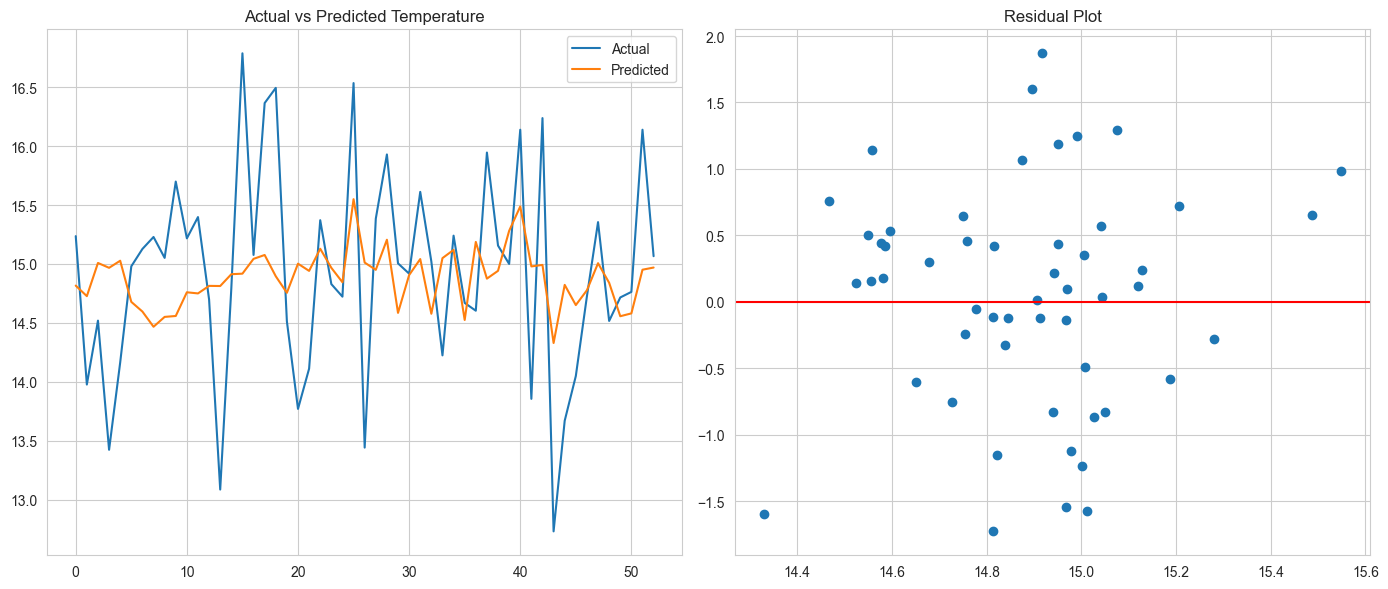

In [14]:
# Model Diagnostics


plt.figure(figsize=(14, 6))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Temperature')
plt.legend()

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred, y_test.values - y_pred)
plt.axhline(0, color='red')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Feature Importance

if hasattr(final_model, 'feature_importances_'):
    pd.Series(final_model.feature_importances_, index=feature_cols)\
      .sort_values().plot(kind='barh', title='Feature Importance')
    plt.show()


In [15]:
# Future Temperature Projection

last_date = model_df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=25, freq='M')[1:]

# Estimate CO2 trend
co2_trend = (model_df['CO2 Emissions'].iloc[-1] - model_df['CO2 Emissions'].iloc[0]) / len(model_df)
current_co2 = model_df['CO2 Emissions'].iloc[-1]

future_rows = []
for _ in future_dates:
    current_co2 += co2_trend
    future_rows.append({
        'CO2 Emissions': current_co2,
        'CO2_Lag1': current_co2 - co2_trend,
        'Temp_Lag1': model_df['Temperature'].iloc[-1],
        'Temp_Rolling_12': model_df['Temperature'].rolling(12).mean().iloc[-1],
        'Sea Level Rise': model_df['Sea Level Rise'].mean(),
        'Precipitation': model_df['Precipitation'].mean(),
        'Humidity': model_df['Humidity'].mean(),
        'Wind Speed': model_df['Wind Speed'].mean()
    })

future_df = pd.DataFrame(future_rows)

# Predict future temperature
if best_model_name == "Linear Regression":
    future_predictions = final_model.predict(scaler.transform(future_df[feature_cols]))
else:
    future_predictions = final_model.predict(future_df[feature_cols])


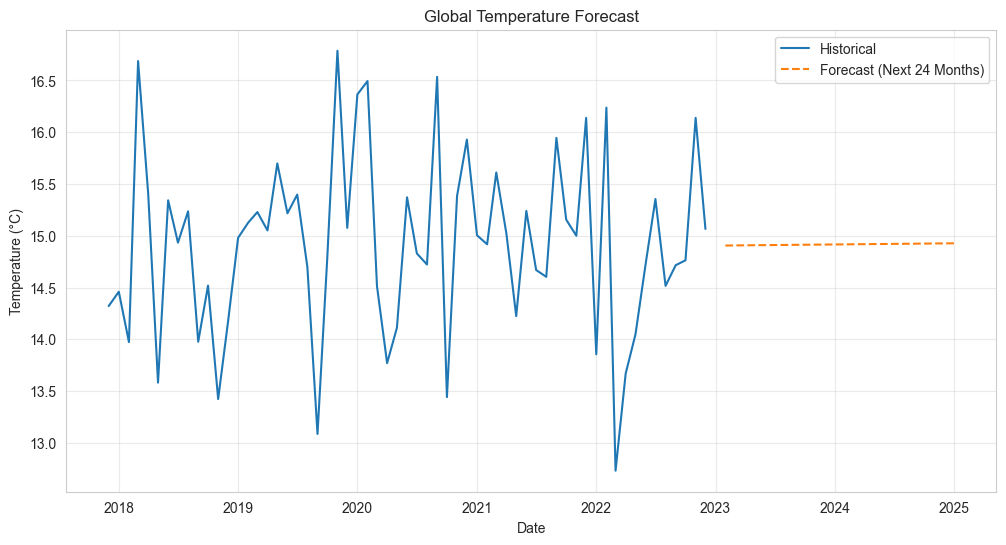

--- Forecast Head ---
        Date  Predicted Temp
0 2023-01-31       14.905760
1 2023-02-28       14.906693
2 2023-03-31       14.907625
3 2023-04-30       14.908557
4 2023-05-31       14.909489


In [16]:
# Forecast Visualization

plt.figure(figsize=(12, 6))

history = model_df[
    model_df['Date'] >= model_df['Date'].max() - pd.DateOffset(years=5)
]

plt.plot(history['Date'], history['Temperature'], label='Historical')
plt.plot(future_dates, future_predictions, '--', label='Forecast (Next 24 Months)')

plt.title('Global Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

# Print Table
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Temp': future_predictions.flatten()})
print("--- Forecast Head ---")
print(forecast_df.head())



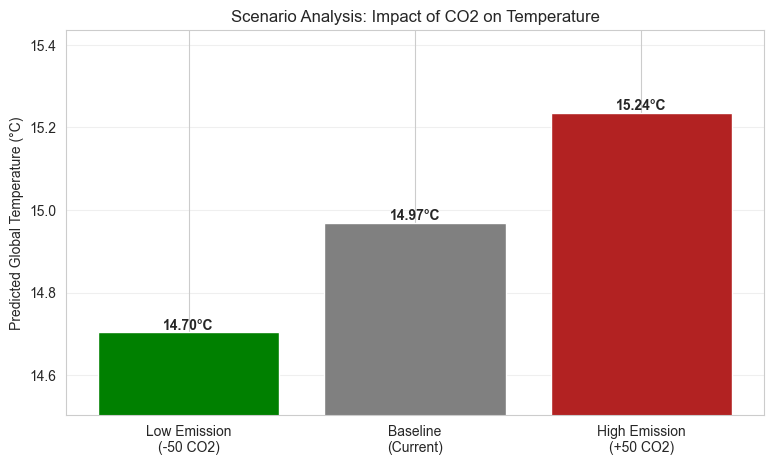

Insight: Increasing CO2 by 50 units increases predicted temperature by 0.27°C


In [17]:
# Scenario Analysis: CO2 Impact on Temperature

# 1. Get baseline input (most recent climate state)
baseline_input = model_df[feature_cols].iloc[-1:].values  # shape (1, n_features)

# Dynamically find CO2 column index
co2_idx = feature_cols.index('CO2 Emissions')

# 2. Create scenarios
input_high = baseline_input.copy()
input_low = baseline_input.copy()

# High CO2 scenario (+50 units)
input_high[0, co2_idx] += 50

# Low CO2 scenario (-50 units, clipped)
input_low[0, co2_idx] = max(0, input_low[0, co2_idx] - 50)

# 3. Predict outcomes
def safe_predict(x):
    if best_model_name == "Linear Regression":
        return final_model.predict(scaler.transform(x))[0]
    return final_model.predict(x)[0]

pred_base = safe_predict(baseline_input)
pred_high = safe_predict(input_high)
pred_low = safe_predict(input_low)

# 4. Visualization
scenarios = [
    'Low Emission\n(-50 CO2)',
    'Baseline\n(Current)',
    'High Emission\n(+50 CO2)'
]
temps = [pred_low, pred_base, pred_high]
colors = ['green', 'gray', 'firebrick']

plt.figure(figsize=(9, 5))
bars = plt.bar(scenarios, temps, color=colors)

# KEY: Zoom Y-axis so differences are visible
plt.ylim(min(temps) - 0.2, max(temps) + 0.2)

plt.title('Scenario Analysis: Impact of CO2 on Temperature')
plt.ylabel('Predicted Global Temperature (°C)')
plt.grid(axis='y', alpha=0.3)

# Value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f"{yval:.2f}°C",
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.show()

print(
    f"Insight: Increasing CO2 by 50 units increases predicted temperature by "
    f"{(pred_high - pred_base):.2f}°C"
)

